In [1]:
#For Mounting the google drive in colab notebook, to access files saved in the folder stored in drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
#One line code to load the python script to work with "R" language in colab notebook.
#After loading this, each cell that needs execution in "R", should start with "%%R"
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Loading Data From Gapminder Files

In [51]:

%%R
library(tidyverse)
library(dplyr)
library(ggplot2)
library(modelr)
library(purrr)



rv <- as.data.frame(read_csv("/content/drive/MyDrive/Personal Projects/LIFE EXPECTANCY/ddf--gapminder--systema_globalis-master/countries-etc-datapoints/ddf--datapoints--life_expectancy_years--by--geo--time.csv",col_types = cols())) %>% 
dplyr::inner_join(as.data.frame(read_csv("/content/drive/MyDrive/Personal Projects/LIFE EXPECTANCY/ddf--gapminder--systema_globalis-master/countries-etc-datapoints/ddf--datapoints--infant_mortality_rate_per_1000_births--by--geo--time.csv",col_types = cols())), by = c("geo","time")) %>%
dplyr::inner_join(as.data.frame(read_csv("/content/drive/MyDrive/Personal Projects/LIFE EXPECTANCY/ddf--gapminder--systema_globalis-master/countries-etc-datapoints/ddf--datapoints--murder_per_100000_people--by--geo--time.csv",col_types = cols())), by = c("geo","time"))  %>%
dplyr::inner_join(as.data.frame(read_csv("/content/drive/MyDrive/Personal Projects/LIFE EXPECTANCY/ddf--gapminder--systema_globalis-master/countries-etc-datapoints/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv",col_types = cols())), by = c("geo","time")) %>%
dplyr::inner_join(as.data.frame(read_csv("/content/drive/MyDrive/Personal Projects/LIFE EXPECTANCY/ddf--gapminder--systema_globalis-master/countries-etc-datapoints/ddf--datapoints--medical_doctors_per_1000_people--by--geo--time.csv",col_types = cols())), by = c("geo","time")) %>%
dplyr::inner_join(as.data.frame(read_csv("/content/drive/MyDrive/Personal Projects/LIFE EXPECTANCY/ddf--gapminder--systema_globalis-master/countries-etc-datapoints/ddf--datapoints--poverty_percent_people_below_550_a_day--by--geo--time.csv",col_types = cols())), by = c("geo","time"))



Checking the relationships between the response variable and potential candidate predictors by coeffecient correlation and visualising linearity

[1] -0.7674301
[1] -0.8726498
[1] -0.7748837
[1] -0.8696892


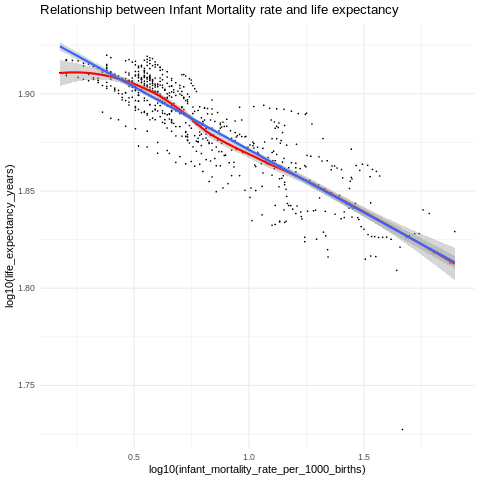

In [52]:
%%R
options(warn = -1)
c1 <- cor(rv$infant_mortality_rate_per_1000_births, rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c2 <- cor(log10(rv$infant_mortality_rate_per_1000_births), rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c3 <- cor(rv$infant_mortality_rate_per_1000_births, log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
c4 <- cor(log10(rv$infant_mortality_rate_per_1000_births), log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
print(c1)
print(c2)
print(c3)
print(c4)
plt1_g <- ggplot(rv, aes(x=log10(infant_mortality_rate_per_1000_births),y=log10(life_expectancy_years)))+
        geom_point(size=0.1)+
        geom_smooth(color = "red", method = "loess", formula = y ~ x)+
        geom_smooth(method = "lm", formula = y ~ x)+
        ggtitle("Relationship between Infant Mortality rate and life expectancy")+
  theme_minimal()
print(plt1_g)

The relationship between life expectancy and log transformation of infant mortality rate has the strongest coeffecient correlation and there is a negative coefficient correlation between these two continuous variables. For every increase in value of x, the value of y decreases depending upon how steep the slope is.


[1] -0.5581566
[1] -0.7827137
[1] -0.5634054
[1] -0.7818521


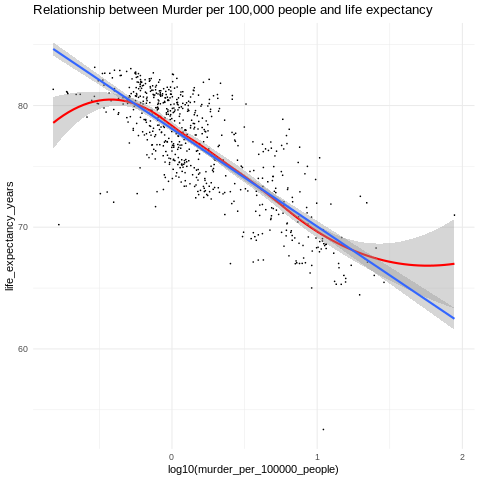

In [54]:
%%R
c1 <- cor(rv$murder_per_100000_people, rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c2 <- cor(log10(rv$murder_per_100000_people), rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c3 <- cor(rv$murder_per_100000_people, log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
c4 <- cor(log10(rv$murder_per_100000_people), log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
print(c1)
print(c2)
print(c3)
print(c4)
plt2_g <- ggplot(rv, aes(x=log10(murder_per_100000_people),y=life_expectancy_years))+
        geom_point(size=0.1)+
        geom_smooth(color="red",method = "loess", formula = y ~ x)+
        geom_smooth(method = "lm",formula = y ~ x)+
        ggtitle("Relationship between Murder per 100,000 people and life expectancy")+
  theme_minimal()
print(plt2_g)

The relationship between life expectancy and log transformation of murder per 100,000 people has the strongest coeffecient correlation and there is a negative coefficient correlation between these two continuous variables. For every increase in value of x, the value of y decreases depending upon how steep the slope is.

[1] 0.6863967
[1] 0.8121318
[1] 0.6772444
[1] 0.8075813


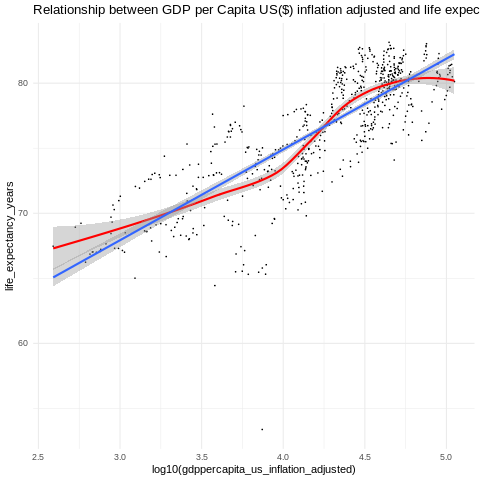

In [55]:
%%R
c1 <- cor(rv$gdppercapita_us_inflation_adjusted, rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c2 <- cor(log10(rv$gdppercapita_us_inflation_adjusted), rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c3 <- cor(rv$gdppercapita_us_inflation_adjusted, log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
c4 <- cor(log10(rv$gdppercapita_us_inflation_adjusted), log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
print(c1)
print(c2)
print(c3)
print(c4)
plt3_g <- ggplot(rv, aes(x=log10(gdppercapita_us_inflation_adjusted),y=life_expectancy_years))+
        geom_point(size=0.1)+
        geom_smooth(color="red",method = "loess", formula = y ~ x)+
        geom_smooth(method = "lm",formula = y ~ x)+
        ggtitle("Relationship between GDP per Capita US($) inflation adjusted and life expectancy")+
  theme_minimal()
print(plt3_g)

The relationship between life expectancy and log transformation of GDP per capita (US$ adjusted for inflation) has the strongest coeffecient correlation and there is a positive coefficient correlation between these two continuous variables. For every increase in value of x, the value of y increases depending upon how steep the slope is.

[1] 0.2846597
[1] 0.2757544
[1] 0.2803675
[1] 0.2730896


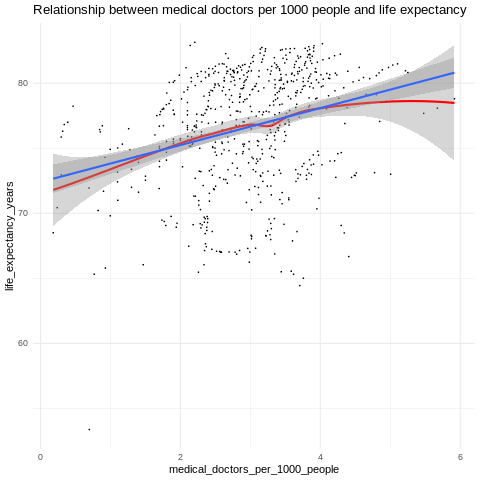

In [56]:
%%R
c1 <- cor(rv$medical_doctors_per_1000_people, rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c2 <- cor(log10(rv$medical_doctors_per_1000_people), rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c3 <- cor(rv$medical_doctors_per_1000_people, log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
c4 <- cor(log10(rv$medical_doctors_per_1000_people), log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
print(c1)
print(c2)
print(c3)
print(c4)
plt4_g <- ggplot(rv, aes(x=medical_doctors_per_1000_people,y=life_expectancy_years))+
        geom_point(size=0.1)+
        geom_smooth(color="red",method = "loess", formula = y ~ x)+
        geom_smooth(method = "lm",formula = y ~ x)+
        ggtitle("Relationship between medical doctors per 1000 people and life expectancy")+
  theme_minimal()
print(plt4_g)


The relationship between life expectancy and Medical doctors (per 1,000 people) has the strongest coeffecient correlation and there is a positive coefficient correlation between these two continuous variables. For every increase in value of x, the value of y increases depending upon how steep the slope is.

[1] -0.7293084
[1] NaN
[1] -0.7332282
[1] NaN


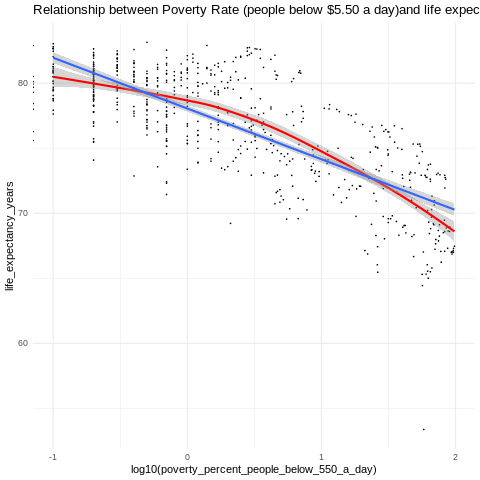

In [57]:
%%R
c1 <- cor( rv$poverty_percent_people_below_550_a_day, rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c2 <- cor( log10(rv$poverty_percent_people_below_550_a_day), rv$life_expectancy_years, method = c("pearson", "kendall", "spearman"))
c3 <- cor( rv$poverty_percent_people_below_550_a_day, log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
c4 <- cor(log10(rv$poverty_percent_people_below_550_a_day), log10(rv$life_expectancy_years), method = c("pearson", "kendall", "spearman"))
print(c1)
print(c2)
print(c3)
print(c4)
plt5_g <- ggplot(rv, aes(x=log10(poverty_percent_people_below_550_a_day),y=life_expectancy_years))+
        geom_point(size=0.1)+
        geom_smooth(color="red",method = "loess", formula = y ~ x)+
        geom_smooth(method = "lm",formula = y ~ x)+
        ggtitle("Relationship between Poverty Rate (people below $5.50 a day)and life expectancy")+
  theme_minimal()
print(plt5_g)

The relationship between life expectancy and log transformation of Poverty rate (people below $5.50 a day) has the strongest coeffecient correlation and there is a negative coefficient correlation between these two continuous variables. For every increase in value of x, the value of y decreases depending upon how steep the slope is.


There are predictors with negative and positive correlation coeffecient both, but the one that has the strongest coeffecient correlation either negative or the positive one : depicts that the response variable is how much related to the predictor. The higher the coeffecient correlation to either negative or positive "one', the better the relationship between the response variable and the predictor.

So the highest coeffecient correlation is of response variable "life expectancy" with the predictor "infant mortality rate", strongly negative coeffecient correlation meaning that for certain increases in value of infant mortality rate, there is a considerable amount of decrease in life expectancy

**Building & plotting the model(naming it model 1) and then Performing Model Diagonostics using residual plot:**

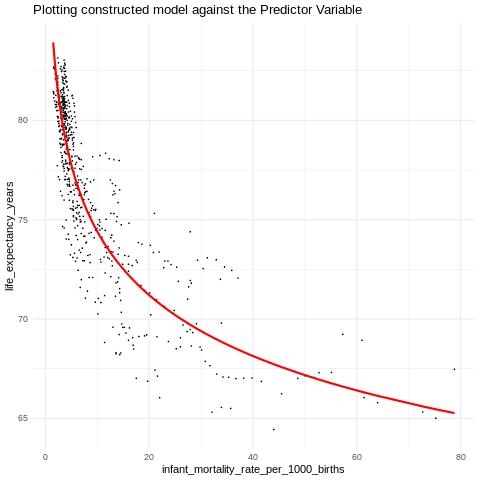

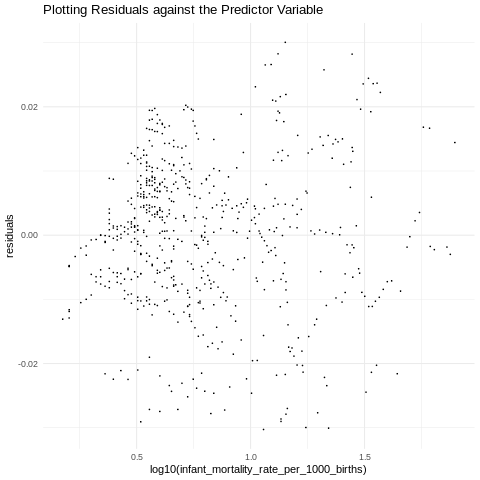

In [60]:
%%R
model1 <- lm(log10(life_expectancy_years) ~ log10(infant_mortality_rate_per_1000_births),data = rv)

  rv <- rv %>%
  add_predictions(model1, "log10pred") %>%
  mutate(pred = 10^log10pred) %>%
  add_residuals(model1, "residuals")
  
  
  plt <-ggplot(rv,aes(x=infant_mortality_rate_per_1000_births)) +
  geom_point(aes(y=life_expectancy_years),size = 0.1) +
  geom_line(aes(y=pred), color="red", size=1) +
  ggtitle("Plotting constructed model against the Predictor Variable")+
  theme_minimal()

  print(plt)

  plt1 <- ggplot(rv,aes(x=log10(infant_mortality_rate_per_1000_births))) +
  geom_point(aes(y=residuals), size = 0.1) +
  ggtitle("Plotting Residuals against the Predictor Variable")+
  theme_minimal()
  
  print(plt1)

**"The RMSE of the current model is" "0.0128450506007272"**

As the definition of residual plot says that when residuals are plotted on y axis and the independent variable is plotted on x-axis and the points are randomly scattered, the model is appropriate for the linear regression on the given data. Since the points above are randomly scattered, the model built is appropriate for linear regression.

While the residual plot is roughly scattered, there is one outlier that seems very odd, which is the infant mortality rate between 45 to 50 (which in log case is greater than 1.5) and its residual is negative 1 tenth (-0.1), and this is the only point that is very oddly apart from the remaining data.



**Removing the outliers below and refitting model so that the model is more appropriate:**

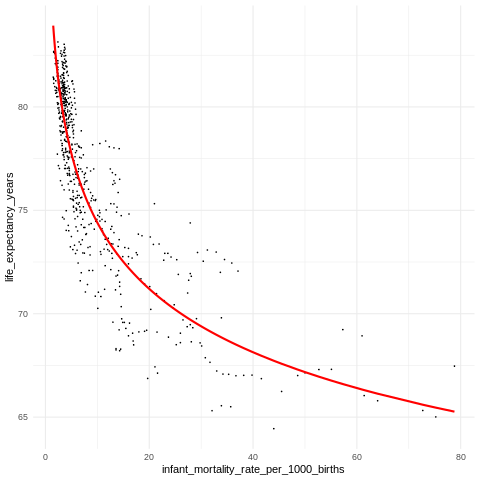

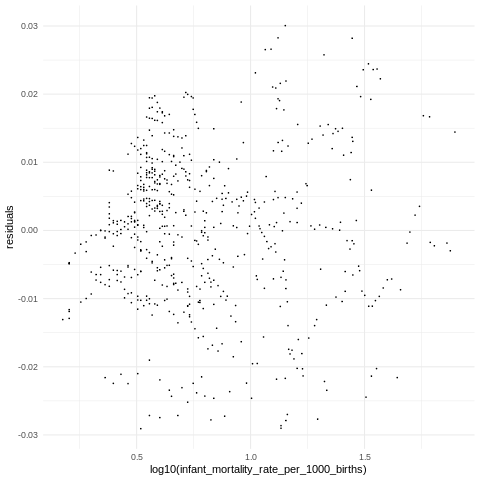

In [61]:
%%R
  tmp <- as.data.frame(rv$residuals[!rv$residuals %in% boxplot.stats(rv$residuals)$out])
  tmp <- rename(tmp,"residuals" = "rv$residuals[!rv$residuals %in% boxplot.stats(rv$residuals)$out]")
  rv <- inner_join(rv,tmp, by = c("residuals" = "residuals"))
    
  plt <-ggplot(rv,aes(x=infant_mortality_rate_per_1000_births)) +
  geom_point(aes(y=life_expectancy_years),size = 0.1) +
  geom_line(aes(y=pred), color="red", size=1) +
  theme_minimal()

  print(plt)
  
  plt1 <- ggplot(rv,aes(x=log10(infant_mortality_rate_per_1000_births))) +
  geom_point(aes(y=residuals), size = 0.1) +
  theme_minimal()
  
  print(plt1)

**"The RMSE of the model after removing all outliers is 0.0115220444844038"**

Plotting the residuals of the model against the remaining potential candidate predictors to choose which of those remaining predictors can be added along with the already added predictor.

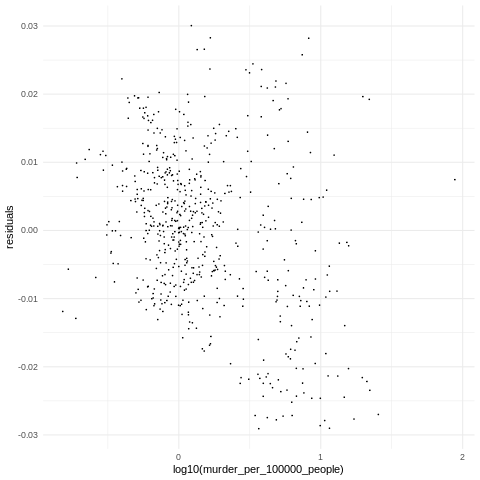

In [62]:
#Plotting potential candidate 1
%%R
cnd1 <- rv %>%
  add_residuals(model1, "residuals") %>%
  ggplot(aes(x=log10(murder_per_100000_people))) +
  geom_point(aes(y=residuals), size = 0.1) +
  theme_minimal()

print(cnd1)

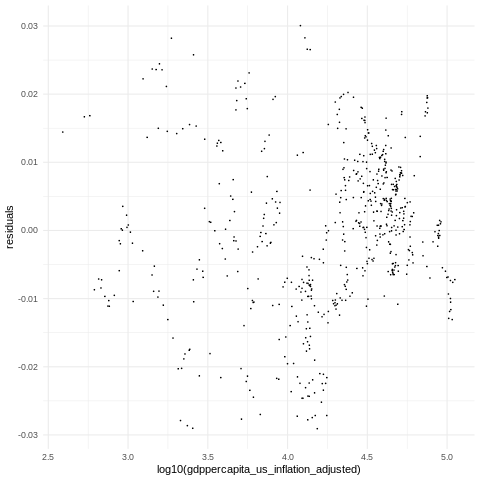

In [63]:
#Plotting potential candidate 2
%%R
cnd2 <- rv %>%
  add_residuals(model1, "residuals") %>%
  ggplot(aes(x=log10(gdppercapita_us_inflation_adjusted))) +
  geom_point(aes(y=residuals), size = 0.1) +
  theme_minimal()

print(cnd2)

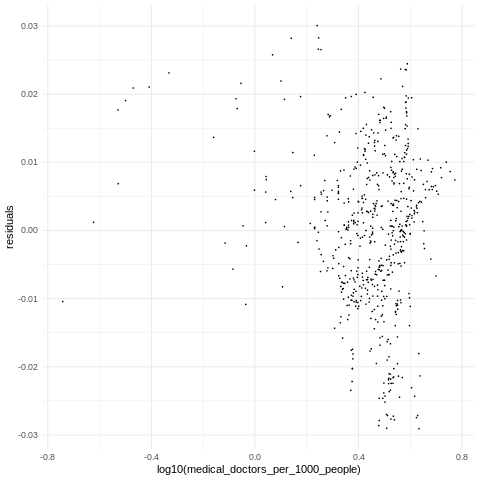

In [64]:
#Plotting potential candidate 3
%%R
cnd3 <- rv %>%
  add_residuals(model1, "residuals") %>%
  ggplot(aes(x=log10(medical_doctors_per_1000_people))) +
  geom_point(aes(y=residuals), size = 0.1) +
  theme_minimal()

cnd3

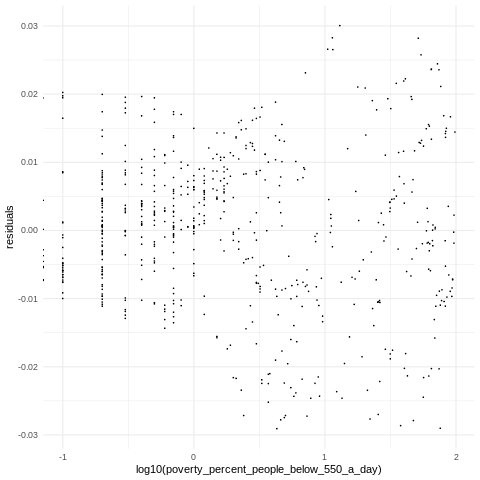

In [65]:
#Plotting potential candidate 4
%%R
cnd4 <- rv %>%
  add_residuals(model1, "residuals") %>%
  ggplot(aes(x=log10(poverty_percent_people_below_550_a_day))) +
  geom_point(aes(y=residuals), size = 0.1) +
  theme_minimal()

cnd4

Now, Choosing the murder_per_100000_people predictor to add to the already existing model which contains life_expectancy_years as response variable and infant_mortality_rate_per_1000_births as the predictor, as it is most evenly scattered than compared to any other left predictors. Remodifying the model and naming it model 2.

In [66]:
#Creating the new Model with the potential candiadate that we decided based on Residual plots.
%%R
model2 <- lm(log10(life_expectancy_years) ~ log10(infant_mortality_rate_per_1000_births)+log10(murder_per_100000_people),data = rv)

Performing Crossfold Validation on the models decided above and calculating their RMSEs

In [71]:
%%R

set.seed(5)
split_data <- crossv_kfold(rv, 10)

do_cv <- function(formula) {
  split_data %>%
    mutate(fit = map(train,
                     ~ lm(formula, data = .)),
         rmse = map2_dbl(fit, test, ~ rmse(.x, .y))) %>%
    summarize(cv_rmse = mean(rmse)) %>%
    pull(cv_rmse)
}

pred_1_n_2 <- do_cv(log10(life_expectancy_years) ~ log10(infant_mortality_rate_per_1000_births))
pred_1_n_2_n_3 <- do_cv(log10(life_expectancy_years) ~ log10(infant_mortality_rate_per_1000_births)+log10(murder_per_100000_people))
print(paste("Model 1",pred_1_n_2,sep = "-----"))
print(paste("Model 2",pred_1_n_2_n_3,sep = "-----"))

[1] "Model 1-----0.0113446179487963"
[1] "Model 2-----0.00997757873615303"


The RMSE of the model with only infant mortality rate as the predictor is higher compared to RMSE of the model with infant mortality rate and murder per 100,000 people as the predictors. So, the model with lower RMSE is the more appropriate model for predciting the values of response variable.


Constructing a Step wise selection function that makes use of the greedy approach in order to select the potential candidates that may be valid to add to the model and creating the best model out of it

In [78]:
%%R
set.seed(4010)
rv_parts <- resample_partition(rv,
                                    p=c(train=0.5,
                                        valid=0.25,
                                        test=0.25))

best_model <- NULL

greedy <- function(res, pred, cnd, split)
{
  pred_n_cnd <- paste0(paste0(pred, collapse="+"), "+", cnd)
  formulas <- lapply(paste0(res, "~", pred_n_cnd), as.formula)
  rmses <- sapply(formulas,
                  function(fm) rmse(lm(fm, data=split$train),data=split$valid))
  names(rmses) <- cnd
  attr(rmses, "best") <- rmses[which.min(rmses)]
  rmses
}

In [79]:
%%R
pred <- "1"
cnd <- c("log10(infant_mortality_rate_per_1000_births)", "log10(murder_per_100000_people)", "log10(gdppercapita_us_inflation_adjusted)", "medical_doctors_per_1000_people", "poverty_percent_people_below_550_a_day") 

first <- greedy("log10(life_expectancy_years)", pred, cnd, rv_parts)

best_model <- c(best_model, attr(first, "best"))

print(best_model)

log10(infant_mortality_rate_per_1000_births) 
                                  0.01163828 


In [80]:
%%R
pred <- "log10(infant_mortality_rate_per_1000_births)"

cnd <- c("log10(murder_per_100000_people)", "log10(gdppercapita_us_inflation_adjusted)", "medical_doctors_per_1000_people", "poverty_percent_people_below_550_a_day")

first <- greedy("log10(life_expectancy_years)", pred, cnd, rv_parts)

best_model <- c(best_model, attr(first, "best"))
print(best_model)

log10(infant_mortality_rate_per_1000_births) 
                                  0.01163828 
             log10(murder_per_100000_people) 
                                  0.01077375 


In [81]:
%%R
pred <- c("log10(infant_mortality_rate_per_1000_births)","log10(murder_per_100000_people)")
cnd <- c("log10(gdppercapita_us_inflation_adjusted)", "medical_doctors_per_1000_people", "poverty_percent_people_below_550_a_day")

first <- greedy("log10(life_expectancy_years)", pred, cnd, rv_parts)

best_model <- c(best_model, attr(first, "best"))
print(best_model)

log10(infant_mortality_rate_per_1000_births) 
                                 0.011638277 
             log10(murder_per_100000_people) 
                                 0.010773749 
   log10(gdppercapita_us_inflation_adjusted) 
                                 0.009931218 


In [82]:
%%R
pred <- c("log10(infant_mortality_rate_per_1000_births)","log10(murder_per_100000_people)",
          "log10(gdppercapita_us_inflation_adjusted)")
cnd <- c("medical_doctors_per_1000_people","poverty_percent_people_below_550_a_day")

first <- greedy("log10(life_expectancy_years)", pred, cnd, rv_parts)

best_model <- c(best_model, attr(first, "best"))
print(best_model)

log10(infant_mortality_rate_per_1000_births) 
                                 0.011638277 
             log10(murder_per_100000_people) 
                                 0.010773749 
   log10(gdppercapita_us_inflation_adjusted) 
                                 0.009931218 
      poverty_percent_people_below_550_a_day 
                                 0.009745359 


In [83]:
%%R
pred <- c("log10(infant_mortality_rate_per_1000_births)","log10(murder_per_100000_people)",
          "log10(gdppercapita_us_inflation_adjusted)","poverty_percent_people_below_550_a_day")
cnd <- c("medical_doctors_per_1000_people")

first <- greedy("log10(life_expectancy_years)", pred, cnd, rv_parts)

best_model <- c(best_model, attr(first, "best"))
print(best_model)

log10(infant_mortality_rate_per_1000_births) 
                                 0.011638277 
             log10(murder_per_100000_people) 
                                 0.010773749 
   log10(gdppercapita_us_inflation_adjusted) 
                                 0.009931218 
      poverty_percent_people_below_550_a_day 
                                 0.009745359 
             medical_doctors_per_1000_people 
                                 0.009708117 


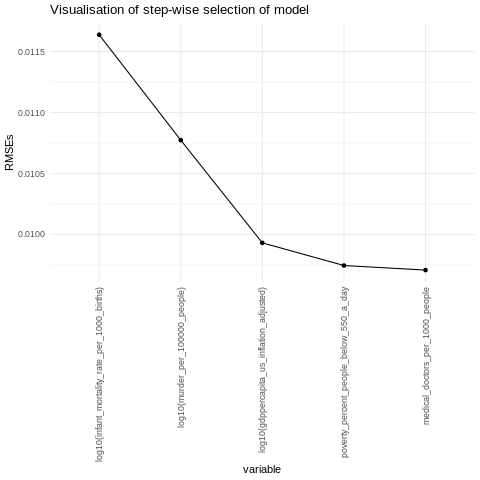

In [90]:
%%R
final_model <- tibble(index=seq_along(best_model),
                     variable=factor(names(best_model), levels=names(best_model)),
                     RMSEs=best_model)

ggplot(final_model, aes(y=RMSEs)) +
  geom_point(aes(x=variable)) +
  geom_line(aes(x=index)) +
  ggtitle("Visualisation of step-wise selection of model")+
  theme_minimal()+
  theme(axis.text.x= element_text(angle = 90, vjust = 0.5, hjust=1))
  


**Finally constructing the model as per scrutinization above, we get the following model of predicting Life Expectancy.**

In [92]:
%%R
model_final <- lm(log10(life_expectancy_years) ~ log10(infant_mortality_rate_per_1000_births) + log10(murder_per_100000_people) + log10(gdppercapita_us_inflation_adjusted) + poverty_percent_people_below_550_a_day,data = rv)
modelr::rmse(model_final,rv)

[1] 0.009414067
